In [92]:
# Import necessary modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import numpy as np


In [93]:
import pandas as pd   

train = pd.read_csv('project/train/_annotations.csv')
test = pd.read_csv('project/test/_annotations.csv')
valid = pd.read_csv('project/valid/_annotations.csv')

In [94]:
train.shape

(770, 8)

In [95]:
train['class'].unique()


array(['syringe n glass', '0'], dtype=object)

In [66]:
"""train = train.replace(to_replace='syringe n glass',
           value=1)
train = train.replace(to_replace='0',
           value=0)
train['class'].unique()"""

"train = train.replace(to_replace='syringe n glass',\n           value=1)\ntrain = train.replace(to_replace='0',\n           value=0)\ntrain['class'].unique()"

In [67]:
"""test = test.replace(to_replace='syringe n glass',
           value=1)
test = test.replace(to_replace='0',
           value=0)
test['class'].unique()"""

"test = test.replace(to_replace='syringe n glass',\n           value=1)\ntest = test.replace(to_replace='0',\n           value=0)\ntest['class'].unique()"

In [68]:
"""valid = valid.replace(to_replace='syringe n glass',
           value=1)
valid = valid.replace(to_replace='0',
           value=0)
valid['class'].unique()"""

"valid = valid.replace(to_replace='syringe n glass',\n           value=1)\nvalid = valid.replace(to_replace='0',\n           value=0)\nvalid['class'].unique()"

In [96]:
train_folder = 'project/train'
test_folder = 'project/test'
valid_folder = 'project/valid'

In [97]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your data generator
train_gen = ImageDataGenerator(
rotation_range=45,
rescale=1./255,
horizontal_flip=True
)
test_gen = ImageDataGenerator(rescale = 1./255)


In [107]:
# Convert the class column to strings (if not already done)
train['class'] = train['class'].astype(str)
test['class'] = test['class'].astype(str)
valid['class'] = valid['class'].astype(str)

# Now create the data generators
train_data = train_gen.flow_from_dataframe(
    dataframe=train, 
    directory=train_folder, 
    x_col="filename", 
    y_col='class', 
    shuffle=True, 
    class_mode="categorical",  # Enables one-hot encoding for multi-class
    target_size=(250, 250),
    color_mode="grayscale"  # Converts images to black and white
)

test_data = test_gen.flow_from_dataframe(
    dataframe=test, 
    directory=test_folder, 
    x_col="filename", 
    y_col='class', 
    shuffle=True, 
    class_mode="categorical",  # Enables one-hot encoding for multi-class
    target_size=(250, 250),
    color_mode="grayscale"  # Converts images to black and white
)

valid_data = test_gen.flow_from_dataframe(
    dataframe=valid, 
    directory=valid_folder, 
    x_col="filename", 
    y_col='class', 
    shuffle=True, 
    class_mode="categorical",  # Enables one-hot encoding for multi-class
    target_size=(250, 250),
    color_mode="grayscale"  # Converts images to black and white
)


Found 770 validated image filenames belonging to 2 classes.
Found 94 validated image filenames belonging to 2 classes.
Found 258 validated image filenames belonging to 2 classes.


In [108]:
train_imgs, train_lbl = next(iter(train_data))
test_imgs, test_lbl = next(iter(test_data))
valid_imgs, valid_lbl = next(iter(valid_data))

In [119]:
train_lbl

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [111]:
print(np.unique(test_lbl))

[0. 1.]


In [112]:
"""test_lbl = test_lbl.astype(int)
train_lbl = train_lbl.astype(int)
valid_lbl - valid_lbl.astype(int)"""

'test_lbl = test_lbl.astype(int)\ntrain_lbl = train_lbl.astype(int)\nvalid_lbl - valid_lbl.astype(int)'

[1. 0.]


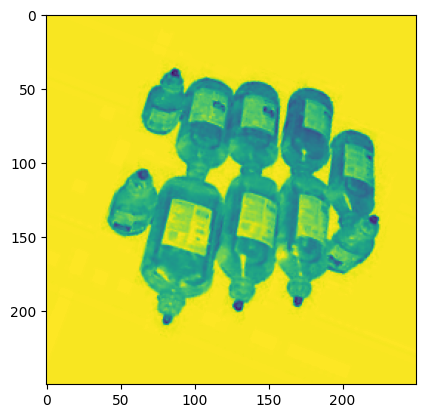

In [122]:
import pylab as plt
plt.imshow(train_imgs[0])
print(train_lbl[0])

In [124]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Build a linear stack of layers with the Sequential model
model = Sequential()

# Convolutional layers (handling grayscale images, input shape is (250, 250, 1))
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(250, 250, 1)))
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Flatten output of conv layers
model.add(Flatten())

# Hidden layers
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

# Output layer for one-hot encoding (2 classes)
model.add(Dense(2, activation='softmax'))

# Model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 250, 250, 50)   │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 250, 250, 75)   │        33,825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 125, 125, 75)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 125, 125, 75)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 125, 125, 125)  │        84,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 62, 62, 125)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 62, 62, 125)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 480500)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 500)            │   240,250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │           502 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240,495,077 (917.42 MB)

 Trainable params: 240,495,077 (917.42 MB)

 Non-trainable params: 0 (0.00 B)

In [125]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
batch_size=10
# Update your checkpoint to use 'val_accuracy'
checkpoint = ModelCheckpoint("clinicalwaste.keras", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')

# Update early stopping to monitor 'val_accuracy' with mode='max'
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='max')

# Ensure your steps_per_epoch and validation_steps are set appropriately
epoch = len(train) // batch_size  # Adjust based on your data
validation_steps = len(test) // batch_size   # Adjust based on your data


In [ ]:
from tensorflow.keras.optimizers import Adam
adam_optimizer = Adam(learning_rate=0.00001)

model.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

result = model.fit(
    train_data,
    steps_per_epoch=epoch,
    epochs=5,
    validation_data=valid_data,
    validation_steps=validation_steps,
    callbacks=[checkpoint, early]
)

Epoch 1/5
 6/77 ━━━━━━━━━━━━━━━━━━━━ 2:33 2s/step - accuracy: 0.4383 - loss: 0.8369

In [29]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data)
print(f"Test accuracy: {test_acc * 100:.2f}%")


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step - accuracy: 0.5082 - loss: 0.6915
Test accuracy: 54.26%


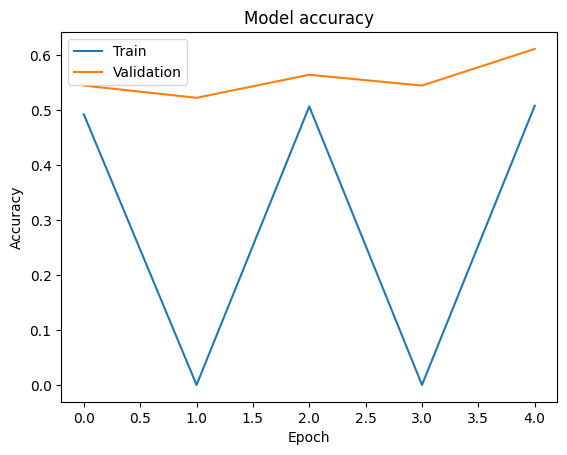

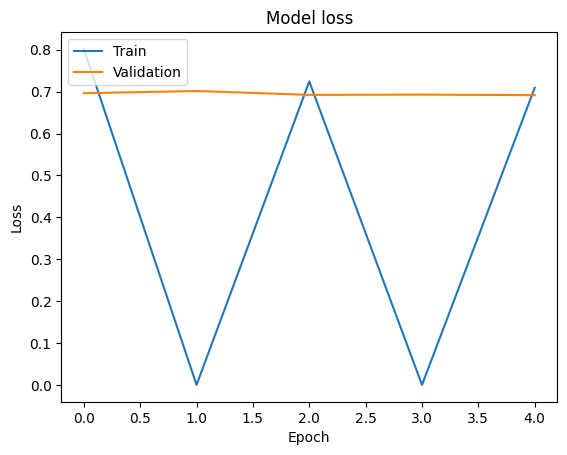

In [30]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted label: 0
Actual label: 1.0


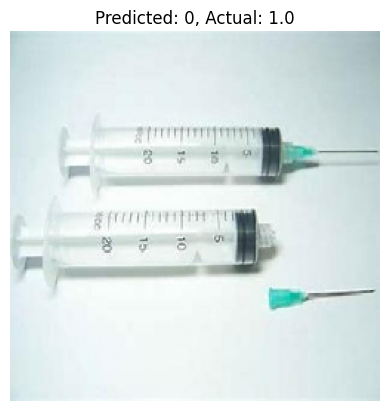

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

index=4

image = test_imgs[index]


image_resized = cv2.resize(image, (250, 250))  

image_normalized = image_resized / 255.0  
image_expanded = np.expand_dims(image_normalized, axis=0)


predictions = model.predict(image_expanded)  #
predicted_label = (predictions > 0.5).astype(int)

actual_label=test_lbl[index]

print(f"Predicted label: {predicted_label[0][0]}") 
print(f"Actual label: {actual_label}")

plt.imshow(image_resized)
plt.title(f"Predicted: {predicted_label[0][0]}, Actual: {actual_label}")
plt.axis('off')  # Hide axes
plt.show()
